# **Better Classifier for Urdu Sentiment Analysis**

In [ ]:
!pip install urduhack 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Libriaries**

In [ ]:
import urduhack
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import urduhack
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_phone_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

### **Importing Data**

In [ ]:
train = pd.read_csv(r"/content/imdb_urdu_reviews_test.csv",encoding = 'utf-8-sig')
test = pd.read_csv(r"/content/imdb_urdu_reviews_test.csv",encoding = 'utf-8-sig')
df =  pd.concat([train, test]).reset_index(drop=True)
print(df.shape)


(20000, 2)


In [ ]:
df.head()

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive


In [ ]:
#sns.countplot( x = 'sentiment', data = df );

## **Preprocessing using Urduhack NLP library for urdu language** 
### source : https://urduhack.readthedocs.io/en/stable/reference/preprocessing.html
- In it we are dealing with
- normalize_whitespace
- normalize
- remove_punctuation
- remove_accents
- replace_urls
- replace_emails
- replace_phone_numbers
- replace_currency_symbols
- remove_english_alphabets

In [ ]:
# Removing Stop Words

df['review'] = df['review'].apply(normalize)
df['review'] = df['review'].apply(normalize_whitespace)
df['review'] = df['review'].apply(remove_punctuation)
df['review'] = df['review'].apply(remove_accents)
df['review'] = df['review'].apply(replace_urls)
df['review'] = df['review'].apply(replace_emails)
df['review'] = df['review'].apply(replace_phone_numbers)
df['review'] = df['review'].apply(replace_currency_symbols)
df['review'] = df['review'].apply(remove_english_alphabets)



#**Vectorization using TF-IDF and Label Encoding**



In [ ]:
LE = LabelEncoder()

X_train, X_test, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size = 0.30, random_state = 7)
train_y = LE.fit_transform(train_y)
train_y
test_y = LE.fit_transform(test_y)
test_y


array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)
train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)


## **1) Logistic Regression**

In [ ]:
LR = LogisticRegression()
LR.fit(train_vecs, train_y)


test_predictionLR = LR.predict(test_vecs)
print(classification_report(test_predictionLR, test_y))





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2883
           1       0.91      0.89      0.90      3117

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



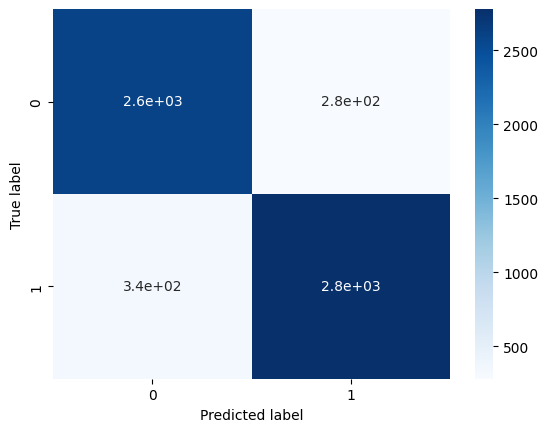

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_predictionLR, test_y)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

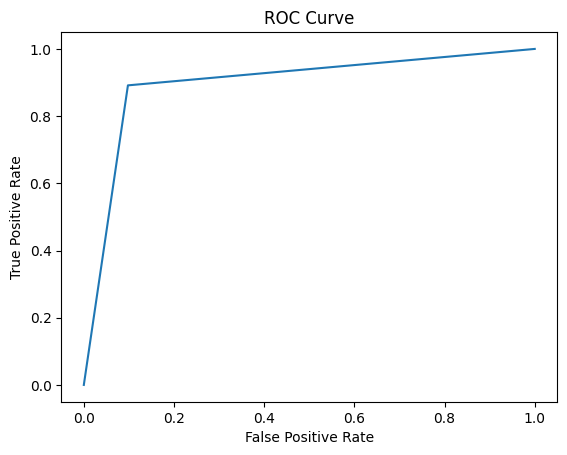

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(test_predictionLR, test_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

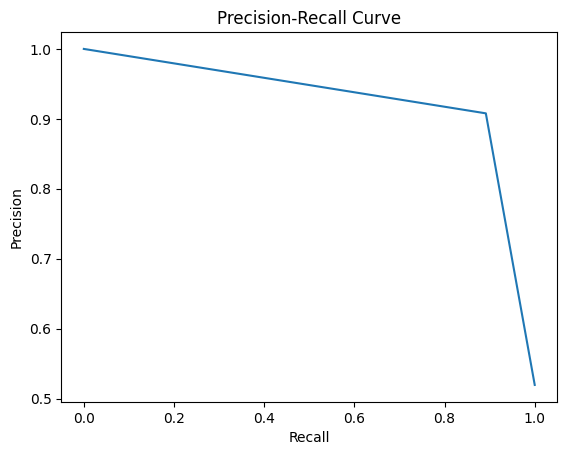

In [ ]:
# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(test_predictionLR, test_y)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## **2) Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()


NB.fit(train_vecs.toarray(), train_y)

test_predictionNB = NB.predict(test_vecs.toarray())

print(classification_report(test_predictionNB, test_y))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      3413
           1       0.76      0.89      0.82      2587

    accuracy                           0.83      6000
   macro avg       0.83      0.84      0.83      6000
weighted avg       0.84      0.83      0.83      6000



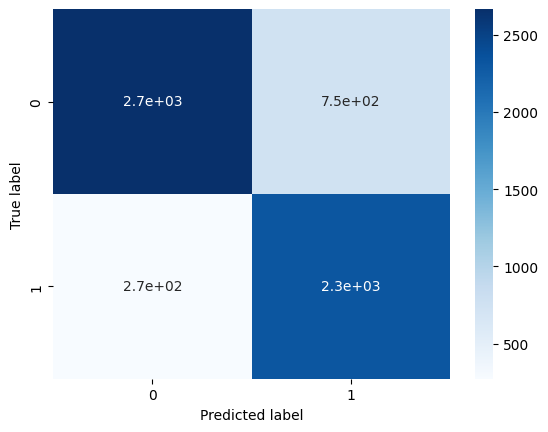

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_predictionNB, test_y)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

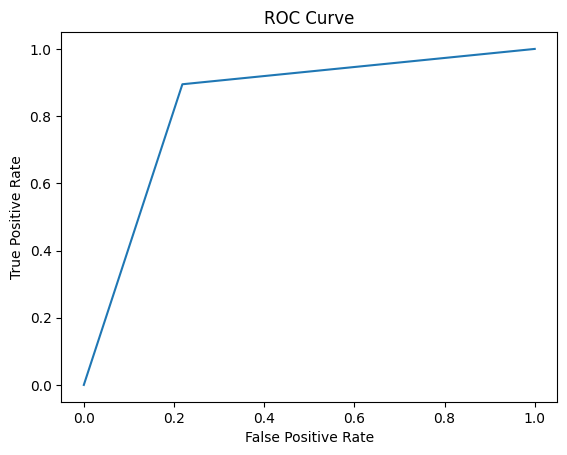

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(test_predictionNB, test_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

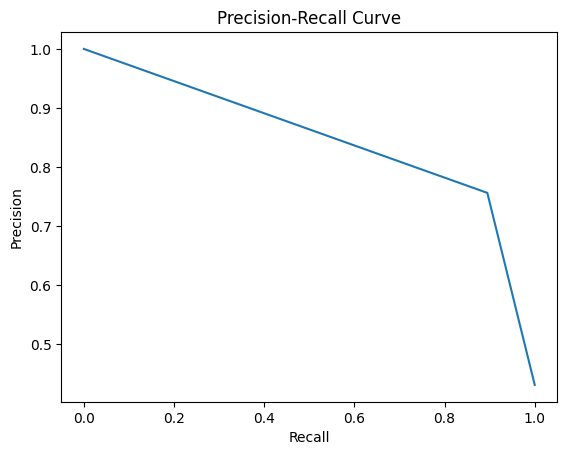

In [ ]:
# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(test_predictionNB, test_y)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **3) Decision Tree**



In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier()

tree_clf.fit(train_vecs.toarray(), train_y)


test_predictionTree = tree_clf.predict(test_vecs.toarray())

print(classification_report(test_predictionTree, test_y))



              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2974
           1       0.88      0.89      0.88      3026

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



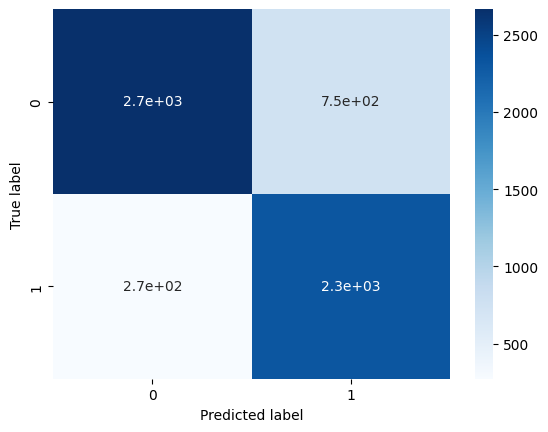

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_predictionNB, test_y)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

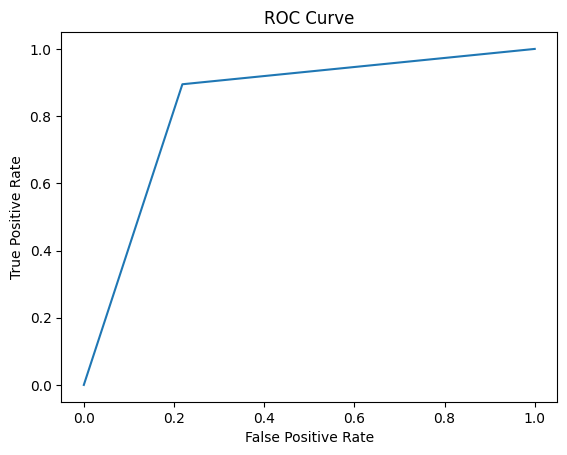

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(test_predictionNB, test_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

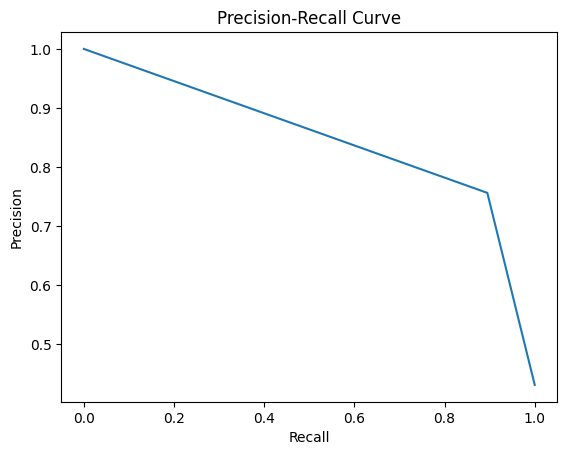

In [ ]:
# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(test_predictionNB, test_y)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **4) SVM**

In [ ]:
from sklearn.svm import SVC


svm = SVC(kernel='linear', C=1)


svm.fit(train_vecs, train_y)

test_predictionsvm = svm.predict(test_vecs)

print(classification_report(test_predictionsvm, test_y))




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2900
           1       0.93      0.92      0.92      3100

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



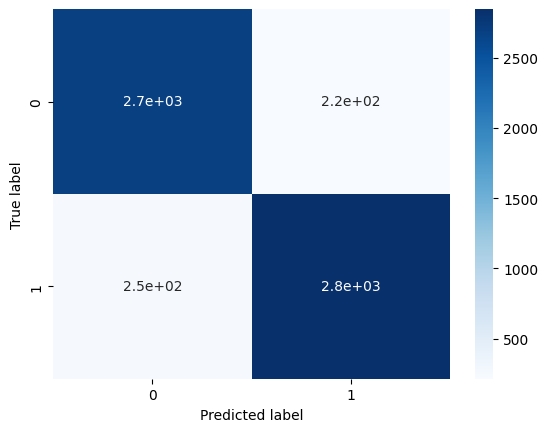

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_predictionsvm, test_y)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

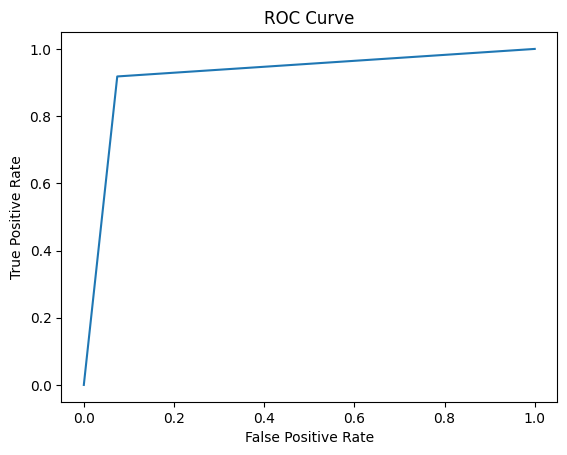

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(test_predictionsvm, test_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

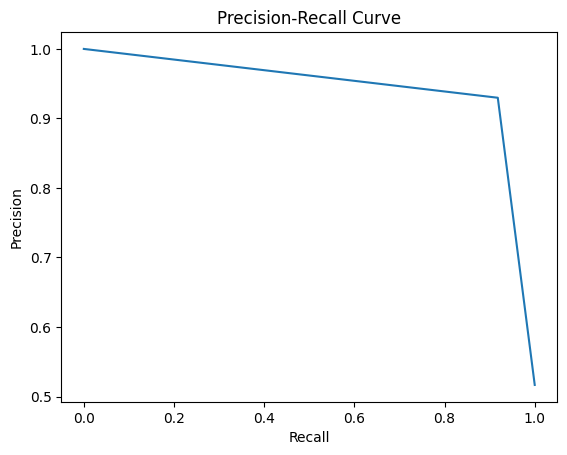

In [ ]:
# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(test_predictionsvm, test_y)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **5) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(train_vecs, train_y)

y_pred = rf.predict(test_vecs)

print(classification_report(y_pred, test_y))



<ipython-input-26-a30426db7d52>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_vecs, train_y)


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2969
           1       0.94      0.95      0.95      3031

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



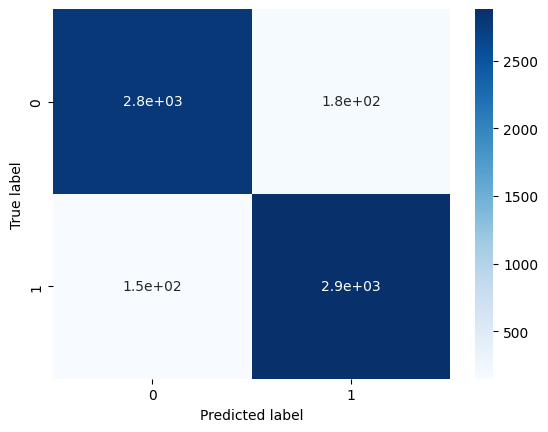

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_pred, test_y)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

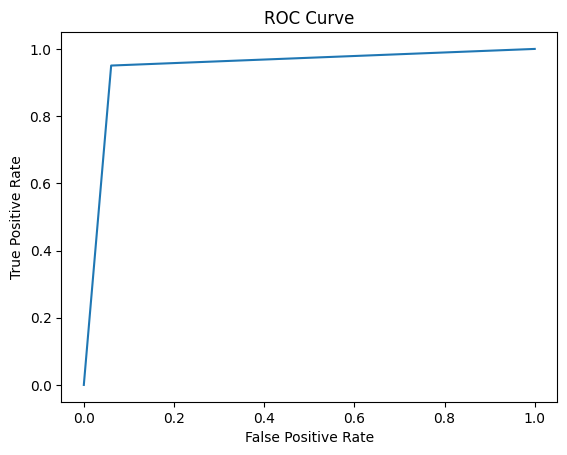

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_pred, test_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

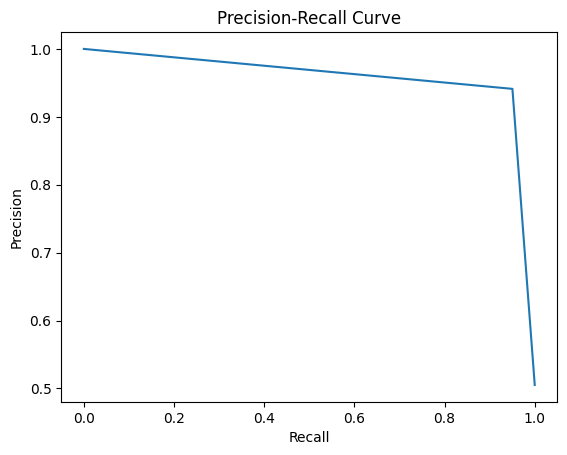

In [ ]:
# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_pred, test_y)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **6) KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_vecs, train_y)

y_pred = knn.predict(test_vecs.toarray())

print(classification_report(y_pred, test_y))



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2943
           1       0.73      0.73      0.73      3057

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000



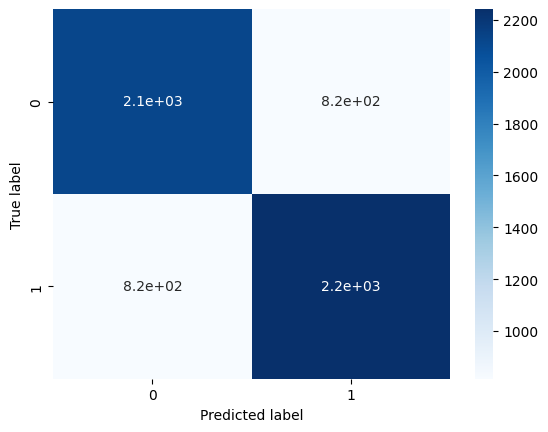

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_pred, test_y)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

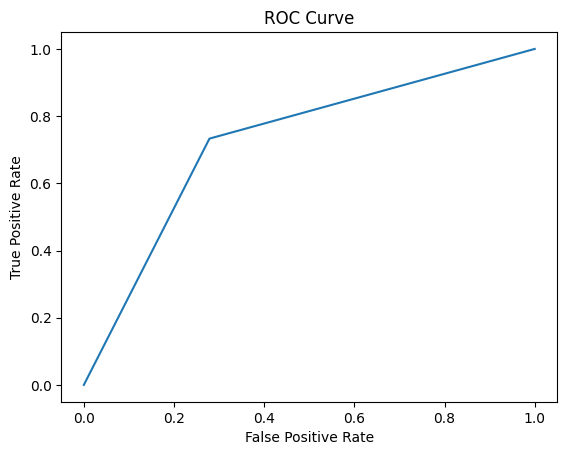

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_pred, test_y)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

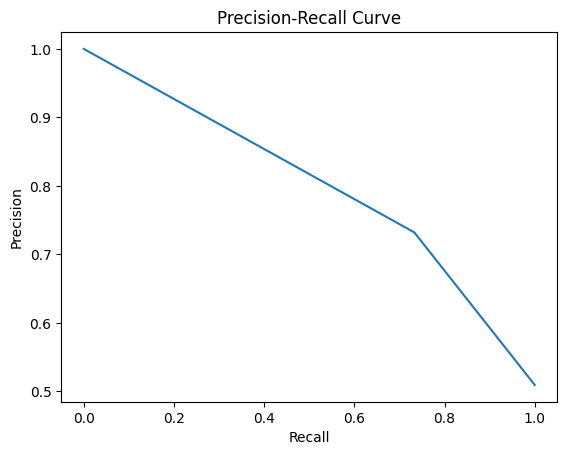

In [ ]:
# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_pred, test_y)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()